In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to Change These)
covid = "covid-clinical-trial_data.csv"

# Read Purchasing File and store into Pandas data frame
covid_df = pd.read_csv(covid)
covid_df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,NaN,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,Tufts Medical Center|National Institutes of He...,...,1-Jun-20,22-Jan-21,22-Jan-21,11-Jun-20,NaN,18-Feb-21,"Tufts Medical Center, Boston, Massachusetts, U...",NaN,https://ClinicalTrials.gov/show/NCT04425538,NaN
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,NaN,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,Vicore Pharma AB|Orphan Reach,...,21-Jul-20,13-Oct-20,13-Oct-20,30-Jun-20,30-Apr-21,30-Apr-21,"Department of Medicine, Civil Hospital and B J...","""Study Protocol and Statistical Analysis Plan""...",https://ClinicalTrials.gov/show/NCT04452435,0.4891
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,NaN,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,Fundacion SEIMC-GESIDA|Roche Pharma AG|Dynamic...,...,22-May-20,23-Dec-20,23-Dec-20,24-Jun-20,NaN,3-Feb-21,"Hospital Universitario de Cabueñes, Gijón, Ast...",NaN,https://ClinicalTrials.gov/show/NCT04445272,NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",NaN,Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,Universidade Nova de Lisboa|NOVA Medical Schoo...,...,20-Apr-20,1-Jul-20,16-Jul-20,21-Apr-20,NaN,25-Aug-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",NaN,https://ClinicalTrials.gov/show/NCT04355741,NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,NaN,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,Liaquat University of Medical & Health Sciences,...,29-Sep-20,28-Mar-21,15-Apr-21,8-Oct-20,NaN,22-Apr-21,"Liaquat University Hospital, Jāmshoro, Sindh, ...",NaN,https://ClinicalTrials.gov/show/NCT04578158,NaN


In [3]:
#columns to delete
remove_columns = covid_df.drop(columns=['Acronym', 'Sponsor/Collaborators', 'Study Designs', 'Other IDs', 'Primary Completion Date', 'Results First Posted', 'Last Update Posted', 'Study Documents', 'URL'])
remove_columns.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,1-Jun-20,22-Jan-21,11-Jun-20,"Tufts Medical Center, Boston, Massachusetts, U...",NaN
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,21-Jul-20,13-Oct-20,30-Jun-20,"Department of Medicine, Civil Hospital and B J...",0.4891
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,22-May-20,23-Dec-20,24-Jun-20,"Hospital Universitario de Cabueñes, Gijón, Ast...",NaN
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,20-Apr-20,16-Jul-20,21-Apr-20,"Hospital CUF Infante Santo, S.A., Lisbon, Port...",NaN
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,29-Sep-20,15-Apr-21,8-Oct-20,"Liaquat University Hospital, Jāmshoro, Sindh, ...",NaN


In [34]:
#update locations to countries
remove_columns['Locations'] = remove_columns['Locations'].str.rsplit(',').str[-1]
remove_columns.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations
0,1,NCT04425538,A Phase 2 Trial of Infliximab in Coronavirus D...,Completed,No Results Available,COVID-19,Drug: Infliximab,Time to improvement in oxygenation|28-day mort...,All,"18 Years and older (Adult, Older Adult)",Phase 2,17,Other|NIH,Interventional,"June 1, 2020","January 22, 2021","June 11, 2020",United States
1,2,NCT04452435,Safety and Efficacy of C21 in Subjects With CO...,Completed,Has Results,COVID-19,Drug: C21|Drug: Placebo,Change From Baseline in C-reactive Protein (CR...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,206,Industry|Other,Interventional,"July 21, 2020","October 13, 2020","June 30, 2020",United Kingdom
2,3,NCT04445272,Clinical Trial to Evaluate the Effectiveness a...,Completed,No Results Available,COVID-19,Drug: Tocilizumab,To calulate the time of intubation|To calculat...,All,"18 Years and older (Adult, Older Adult)",Phase 2,495,Other|Industry,Interventional,"May 22, 2020","December 23, 2020","June 24, 2020",Spain
3,4,NCT04355741,"Gut Microbiota, ""Spark and Flame"" of COVID-19 ...",Completed,No Results Available,COVID-19,Other: Exposure,Differences in gut microbiota composition betw...,All,"18 Years and older (Adult, Older Adult)",NaN,115,Other,Observational,"April 20, 2020","July 16, 2020","April 21, 2020",Portugal
4,5,NCT04578158,Trial to Study the Adjuvant Benefits of Querce...,Completed,No Results Available,COVID-19,Drug: Standard COVID-19 care|Dietary Supplemen...,Percentage of subjects with COVID-19 disease p...,All,"18 Years and older (Adult, Older Adult)",Phase 3,152,Other,Interventional,"September 29, 2020","April 15, 2021","October 8, 2020",Pakistan


In [4]:
#counts of countries #some locations not parsed properly...repuplic of= korea,  islamic republic=iran, nan=Kazakhstan
remove_columns['Locations'].unique()

array(['Tufts Medical Center, Boston, Massachusetts, United States',
       'Department of Medicine, Civil Hospital and B J Medical College, Ahmadabad, Gujarat, India|Infectious Disease, Metas Adventist Hospital, Surat, Gujarat, India|Clinical Research Department, Basement, Unity Trauma Centre and ICU (Unity Hospital, Surat, Gujarat, India|First Floor Clinical Research Department Rhythm Heart Institute, Vadodara, Gujarat, India|Internal Medicine S.L. Raheja Hospital, Mumbai, Maharashtra, India|Department of Medicine, Government Medical College and Hospital, Nagpur, Maharashtra, India|Neuro Critical Care, Grant Medical Foundation Ruby Hall Clinic, Pune, Maharashtra, India|Department of Medicine, Noble Hospitals Pvt. Ltd, Pune, Maharashtra, India|Respiratory Medicine, University College Hospital, London, United Kingdom',
       "Hospital Universitario de Cabueñes, Gijón, Asturias, Spain|Hospital Universitari de Bellvitge, L'Hospitalet De Llobregat, Barcelona, Spain|Hospital Sant Joan de 

In [5]:
#counts of funded bys
remove_columns['Funded Bys'] = remove_columns['Funded Bys'].replace(
{'Industry|Other' : 'Industry', 'Other|Industry' : 'Industry', 'NIH': 'Govt', 'Other|NIH' : 'Govt', 'Other|U.S. Fed' : 'Govt', 'U.S. Fed|Other' : 'Govt', 'U.S. Fed': 'Govt', 'NIH|Other': 'Govt', 'NIH|Industry' : 'Govt'})

In [6]:
#clean up funded bys
remove_columns['Funded Bys'].value_counts()

Other       949
Industry    159
Govt         15
Name: Funded Bys, dtype: int64

In [7]:

remove_columns.count()

Rank                1123
NCT Number          1123
Title               1123
Status              1123
Study Results       1123
Conditions          1123
Interventions        932
Outcome Measures    1123
Gender              1116
Age                 1123
Phases               511
Enrollment          1123
Funded Bys          1123
Study Type          1123
Start Date          1123
Completion Date     1123
First Posted        1123
Locations           1120
p-values              13
dtype: int64

In [77]:
import numpy as np
enrollment_sort= remove_columns.sort_values(by='Enrollment', ascending=False)
total_enrolled = enrollment_sort['Enrollment'].sum()
top_enrollment = enrollment_sort.head(4)
top_total = top_enrollment['Enrollment'].sum()
remaining = total_enrolled  - top_total
top_enrollment

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
42,43,NCT04331171,Epidemiological Observation From a Smartphone ...,Completed,No Results Available,COVID-19,Device: Web application users,To assess of the evolution of the number of ca...,All,"18 Years and older (Adult, Older Adult)",NaN,12000000,Industry,Observational,17-Mar-20,15-Nov-20,2-Apr-20,"All French Emergency services, Le Mans, France",NaN
259,260,NCT04460274,Forecast Number of Covid-19 Cases Worldwide,Completed,No Results Available,Covid-19,Other: Model Building|Other: Model validation,Number of Confirmed cases of Covid-19,All,"Child, Adult, Older Adult",NaN,7882471,Other,Observational,31-Dec-19,20-Jun-20,7-Jul-20,"Republic of Turkey, Health Sciences University...",NaN
792,793,NCT04407117,Appendicitis During the National Lockdown Duri...,Completed,No Results Available,Appendicitis,Behavioral: Lock-down and social distancing,Appendectomy|Postoperative length of stay|Mort...,All,"Child, Adult, Older Adult",NaN,6000000,Other,Observational,23-Mar-17,19-Apr-20,29-May-20,"Nordsjaellands Hospital, Hillerød, Denmark",NaN
890,891,NCT04891276,Impact of COVID-19 Infection and Confinement o...,Completed,No Results Available,Diabetic Subjects With Hospital Stays,Other: Data collection,Frequency of lower limb amputations,All,"Child, Adult, Older Adult",NaN,3300000,Other,Observational,16-Oct-20,14-Apr-21,18-May-21,"Chu Dijon Bourogne, Dijon, France",NaN


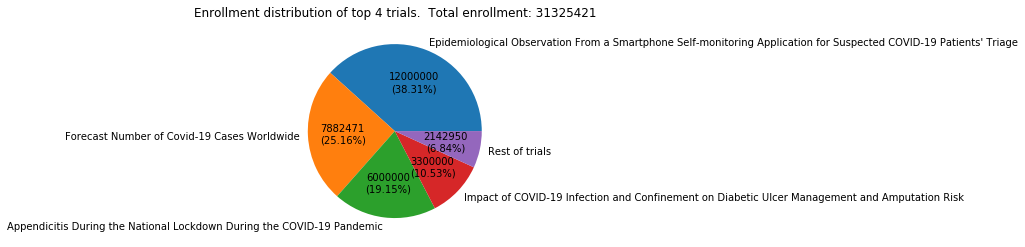

In [100]:
values = np.append(top_enrollment['Enrollment'].to_numpy(), remaining)
labels = np.append(top_enrollment['Title'].to_numpy(), 'Rest of trials')
fig, ax = plt.subplots()

def fmt(x):
    return '{:.0f}\n({:.2f}%)'.format(total_enrolled*x/100, x)
    
ax.pie(values, labels=labels, autopct=fmt)
plt.title(f'Enrollment distribution of top 4 trials.  Total enrollment: {total_enrolled}')
plt.show()

In [130]:
all_has_result = enrollment_sort[enrollment_sort['Study Results'] == 'Has Results']
rest_has_results = enrollment_sort.tail(-4)[enrollment_sort.tail(-4)['Study Results'] == 'Has Results']
print(f"Percentage of all 'has results' coming from the rest of trials: {(rest_has_results['Study Results'].count()/all_has_result['Study Results'].count()) * 100}%")
rest_has_results.head()

Percentage of all 'has results' coming from the rest of trials: 100.0%


,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,Enrollment,Funded Bys,Study Type,Start Date,Completion Date,First Posted,Locations,p-values
790,791,NCT04385238,Health and Wellbeing of Pregnant and Post-Part...,Completed,Has Results,COVID-19|Pregnancy Complications|Mental Health...,Other: This is an online survey with no interv...,Number of Participants With Symptoms of Post-t...,Female,"18 Years and older (Adult, Older Adult)",NaN,6894,Industry,Observational,15-May-20,20-Jun-20,12-May-20,"Pregistry, Los Angeles, California, United States",NaN
118,119,NCT04292899,Study to Evaluate the Safety and Antiviral Act...,Completed,Has Results,COVID-19,Drug: Remdesivir|Drug: Standard of Care,Part A: Percentage of Participants in Each Cli...,All,"12 Years and older (Child, Adult, Older Adult)",Phase 3,4891,Industry,Interventional,6-Mar-20,30-Jun-20,3-Mar-20,"Kaiser Permanente Los Angeles Medical Center, ...",0.1563
1067,1068,NCT04634903,"Testing Scalable, Single-Session Interventions...",Completed,Has Results,Depression,Behavioral: Supportive Therapy SSI|Behavioral:...,Change in Adolescent Depressive Symptom Severi...,All,13 Years to 16 Years (Child),Not Applicable,2452,Other,Interventional,19-Nov-20,15-Mar-21,18-Nov-20,"Stony Brook University, Stony Brook, New York,...",NaN
1035,1036,NCT04308668,Post-exposure Prophylaxis / Preemptive Therapy...,Completed,Has Results,Corona Virus Infection|Acute Respiratory Distr...,Drug: Hydroxychloroquine|Other: Placebo,Number of Participants With Active COVID-19 Di...,All,"18 Years and older (Adult, Older Adult)",Phase 3,1312,Other,Interventional,17-Mar-20,20-May-20,16-Mar-20,"Nationwide Enrollment via Internet, please ema...",NaN
123,124,NCT04292730,Study to Evaluate the Safety and Antiviral Act...,Completed,Has Results,COVID-19,Drug: Remdesivir|Drug: Standard of Care,Part A: Percentage of Participants in Each Cli...,All,"12 Years and older (Child, Adult, Older Adult)",Phase 3,1113,Industry,Interventional,15-Mar-20,26-Jun-20,3-Mar-20,"Kaiser Permanente Los Angeles Medical Center, ...",0.0174


In [84]:
enrollment = remove_columns['Enrollment']
enrollment_mean = '{:.0f}'.format(enrollment.mean())
print(f"The mean participation is {enrollment_mean}")
enrollment_med = '{:.0f}'.format(enrollment.median())
print(f"The median participation is {enrollment_med}")
enrollment_std = '{:.0f}'.format(enrollment.std())
print(f"The std of enrollment is {enrollment_std}")

The mean participation is 27894
The median participation is 150
The std of enrollment is 474353


In [88]:
lowerq = enrollment.quantile(0.25)
upperq = enrollment.quantile(0.75)
iqr = upperq - lowerq
lower_bound = lowerq - 1.5*iqr
upper_bound = upperq + 1.5*iqr
enrollment_without_outliers = enrollment[(enrollment > lower_bound) & (enrollment < upper_bound)]
enrollment_without_outliers.sort_values(ascending=False).head()

35     1033
423    1024
352    1017
904    1011
912    1011
Name: Enrollment, dtype: int64

Text(0.04, 0.5, 'Number of trials')

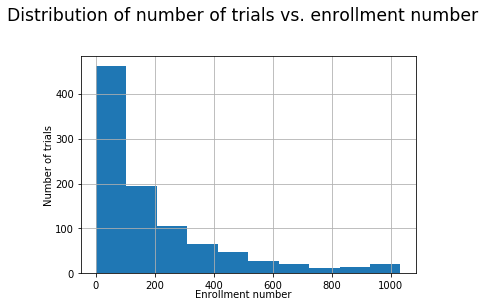

In [133]:
figure, axes = plt.subplots()
enrollment_without_outliers.hist(bins=10, ax=axes)
plt.suptitle('Distribution of number of trials vs. enrollment number', x=0.5, y=1.05, ha='center', fontsize='xx-large')
figure.text(0.5, 0.04, 'Enrollment number', ha='center')
figure.text(0.04, 0.5, 'Number of trials', va='center', rotation='vertical')

In [90]:
enrollment_without_outliers.sum()

195894